# Uygulama: IMDB Movie Scoring & Sorting

In [1]:
import pandas as pd
import math
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# virgülden sonra 5 ondalık göstermesi için bu kodu yazıyoruz.

In [3]:
df = pd.read_csv("datasets/movies_metadata.csv",
                 low_memory=False)  # DtypeWarning kapamak icin

In [4]:
df = df[["title", "vote_average", "vote_count"]]

df.head()

,title,vote_average,vote_count
0,Toy Story,7.70000,5415.00000
1,Jumanji,6.90000,2413.00000
2,Grumpier Old Men,6.50000,92.00000
3,Waiting to Exhale,6.10000,34.00000
4,Father of the Bride Part II,5.70000,173.00000


In [5]:
df.shape

(45466, 3)

In [6]:
# Vote Average'a Göre Sıralama

df.sort_values("vote_average", ascending=False).head(20)

# sadece oy ortalamasına göre sıralama yapıldığında 10 puan alan filmlerin oy sayısının çok düşük olduğunu görüyoruz.

,title,vote_average,vote_count
21642,Ice Age Columbus: Who Were the First Americans?,10.00000,1.00000
15710,If God Is Willing and da Creek Don't Rise,10.00000,1.00000
22396,Meat the Truth,10.00000,1.00000
22395,Marvin Hamlisch: What He Did For Love,10.00000,1.00000
35343,Elaine Stritch: At Liberty,10.00000,1.00000
186,Reckless,10.00000,1.00000
45047,The Human Surge,10.00000,1.00000
22377,The Guide,10.00000,1.00000
22346,هیچ کجا هیچ کس,10.00000,1.00000
1634,Other Voices Other Rooms,10.00000,1.00000


Yukarıdaki sonuçtan hareketle, vote_count' değişkeni belirli bir sayının üzerinde olanları sırala gibi bir yaklaşım getirebiliriz. Lakin bu sefer de vote_count'un kaçtan büyük olacağını seçmemiz gerekmektedir.

In [7]:
df["vote_count"].describe([0.10, 0.25, 0.50, 0.70, 0.80, 0.90, 0.95, 0.99]).T

# Bu filmlerin oy ortalamasının 109 median değerinin ise 10 olduğu gözükmektedir.Verinin rigth (positively) skew'ed olduğunu söyleyebiliriz.
# Ayrıca bakıldığında en fazla oylanan filmin oylanma sayısı ise 14075 olduğu gözükmektedir.


count   45460.00000
mean      109.89734
std       491.31037
min         0.00000
10%         1.00000
25%         3.00000
50%        10.00000
70%        25.00000
80%        50.00000
90%       160.00000
95%       434.00000
99%      2183.82000
max     14075.00000
Name: vote_count, dtype: float64

In [8]:
df["segment"] = pd.qcut(df["vote_count"], q=[0, 0.10, 0.25, 0.50, 0.70, 0.80, 0.90, 0.95, 0.99, 1] 
                                     )

df.groupby("segment").agg("count")

,title,vote_average,vote_count
segment,,,
"(-0.001, 1.0]",6163,6163,6163
"(1.0, 3.0]",5919,5919,5919
"(3.0, 10.0]",11618,11618,11618
"(10.0, 25.0]",8262,8262,8262
"(25.0, 50.0]",4450,4450,4450
"(50.0, 160.0]",4510,4510,4510
"(160.0, 434.0]",2270,2270,2270
"(434.0, 2183.82]",1813,1813,1813
"(2183.82, 14075.0]",455,455,455


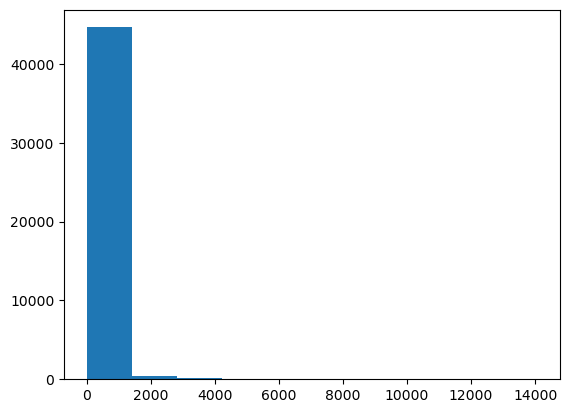

In [9]:
plt.hist(df["vote_count"])
plt.show()

# Hem yıkarıdaki grafikten hem de tablodan filmlerin çoğunun da çok düşük oylandığı grafikten gözükmektedir.

In [10]:
# IMDB Top 250'yi araştıracağımız için de oy sayısı 400'den fazla olanları seçebiliriz.

df[df["vote_count"] > 400].sort_values("vote_average", ascending=False).head(20)

,title,vote_average,vote_count,segment
10309,Dilwale Dulhania Le Jayenge,9.10000,661.00000,"(434.0, 2183.82]"
40251,Your Name.,8.50000,1030.00000,"(434.0, 2183.82]"
834,The Godfather,8.50000,6024.00000,"(2183.82, 14075.0]"
314,The Shawshank Redemption,8.50000,8358.00000,"(2183.82, 14075.0]"
1152,One Flew Over the Cuckoo's Nest,8.30000,3001.00000,"(2183.82, 14075.0]"
1176,Psycho,8.30000,2405.00000,"(2183.82, 14075.0]"
1178,The Godfather: Part II,8.30000,3418.00000,"(2183.82, 14075.0]"
292,Pulp Fiction,8.30000,8670.00000,"(2183.82, 14075.0]"
1184,Once Upon a Time in America,8.30000,1104.00000,"(434.0, 2183.82]"
5481,Spirited Away,8.30000,3968.00000,"(2183.82, 14075.0]"


In [11]:
# Yukarıda hala oy sayısı daha fazla olan filmlerin yeterince tabloda yansıtılmadığına ilişkin çekinceler olabilir.
# Dolayısıyla vote_count değişkenini 1 ile 10 arasına çekip daha sonrasında vote_average değişkeni ile çarpabiliriz.

df["vote_count_score"] = MinMaxScaler(feature_range=(1, 10)). \
    fit(df[["vote_count"]]). \
    transform(df[["vote_count"]])

df.head()


,title,vote_average,vote_count,segment,vote_count_score
0,Toy Story,7.70000,5415.00000,"(2183.82, 14075.0]",4.46252
1,Jumanji,6.90000,2413.00000,"(2183.82, 14075.0]",2.54295
2,Grumpier Old Men,6.50000,92.00000,"(50.0, 160.0]",1.05883
3,Waiting to Exhale,6.10000,34.00000,"(25.0, 50.0]",1.02174
4,Father of the Bride Part II,5.70000,173.00000,"(160.0, 434.0]",1.11062


In [12]:
df["average_count_score"] = df["vote_average"] * df["vote_count_score"]

df.sort_values("average_count_score", ascending=False).head(20)

# Aşağıda artık daha günümüzdeki listeye benzer bir liste gördüğümüzü söyleyebiliriz.

,title,vote_average,vote_count,segment,vote_count_score,average_count_score
15480,Inception,8.10000,14075.00000,"(2183.82, 14075.0]",10.00000,81.00000
12481,The Dark Knight,8.30000,12269.00000,"(2183.82, 14075.0]",8.84519,73.41505
22879,Interstellar,8.10000,11187.00000,"(2183.82, 14075.0]",8.15332,66.04190
17818,The Avengers,7.40000,12000.00000,"(2183.82, 14075.0]",8.67318,64.18153
14551,Avatar,7.20000,12114.00000,"(2183.82, 14075.0]",8.74607,62.97174
26564,Deadpool,7.40000,11444.00000,"(2183.82, 14075.0]",8.31766,61.55065
2843,Fight Club,8.30000,9678.00000,"(2183.82, 14075.0]",7.18842,59.66388
20051,Django Unchained,7.80000,10297.00000,"(2183.82, 14075.0]",7.58423,59.15697
23753,Guardians of the Galaxy,7.90000,10014.00000,"(2183.82, 14075.0]",7.40327,58.48582
292,Pulp Fiction,8.30000,8670.00000,"(2183.82, 14075.0]",6.54387,54.31414


### Ağırlıklı Derecelendirme ( Weighted Rating )

<p align="center" >    
    <img src = "grafikler/imdb.png" width= "800" />
</p>

In [13]:
# weighted_rating = (v/(v+M) * r) + (M/(v+M) * C)

# r = vote average
# v = vote count
# M = minimum votes required to be listed in the Top 250
# C = the mean vote across the whole report (currently 7.0)

In [14]:
# Film 1:

# r = 8
# M = 500
# v = 1000

# Film 1 için formülun ilk kısmını (v/(v+M) * r) ele alalım. 
# (1000 / (1000+500))*8 = 5.33

In [15]:
# Film 2:

# r = 8
# M = 500
# v = 3000

# Film 2 için formülun ilk kısmını (v/(v+M) * r) ele alalım. 
# (3000 / (3000+500))*8 = 6.85

Yukarıda görüldüğü üzere her iki filmin de puanlarının eşit olmasına rağmen daha çok oy olan film 2'nin ödüllendirildiğini görebiliyoruz.

In [16]:
# Film 3:

# r = 9.5
# M = 500
# v = 1000

# Film 3 için formülun ilk kısmını (v/(v+M) * r) ele alalım. 
# (1000 / (1000+500))*9.5 = 6.33

Birinci ve üçüncü film kıyaslandığında yüksek puan almak formulün ilk kısmında avantaj sağlasa da ikinci ve üçüncü film kıyaslandığında daha çok oy almanın daha önemli olduğunu söyleyebiliriz. Zira 9.5 skor almak 8'e göre daha zor olsa da 8 skor alan bir film daha çok oy sayısına sahip olduğu için formulün ilk kısmından daha çok puan almaktadır.

Alışveriş yaparken 100 oyu olup rating'i 4.1 olan ürünü, 1 oyu olup rating'i 5 olan ürüne tercih etmemiz gibi.

Lakin formulün ikinci kısmı incelendiğinde, ikinci kısmın (M/(v+M) * C) yeterince oy sayısına sahip olan lakin görece yine çok fazla oy sayısına sahip olan filmler için formulün ilk kısmının etkisini azaltacak bir düzeltme işlevi gördüğünü söyleyebiliriz.

In [17]:
# C = 7

# Film 1:
# r = 8
# M = 500
# v = 1000

# Birinci bölüm:
# (1000 / (1000+500))*8 = 5.33

# İkinci bölüm:
# 500/(1000+500) * 7 = 2.33

# Toplam = 5.33 + 2.33 = 7.66


# Film 2:
# r = 8
# M = 500
# v = 3000

# Birinci bölüm:
# (3000 / (3000+500))*8 = 6.85

# İkinci bölüm:
# 500/(3000+500) * 7 = 1

# Toplam = 7.85

Yukarıdaki yaptığımız işlemler skor hesaplamak için değil, sıralama yapmak için yapılmıştır.

In [18]:
M = 2500
C = df['vote_average'].mean()

def weighted_rating(r, v, M, C):
    return (v / (v + M) * r) + (M / (v + M) * C)

df.sort_values("average_count_score", ascending=False).head(10)

,title,vote_average,vote_count,segment,vote_count_score,average_count_score
15480,Inception,8.10000,14075.00000,"(2183.82, 14075.0]",10.00000,81.00000
12481,The Dark Knight,8.30000,12269.00000,"(2183.82, 14075.0]",8.84519,73.41505
22879,Interstellar,8.10000,11187.00000,"(2183.82, 14075.0]",8.15332,66.04190
17818,The Avengers,7.40000,12000.00000,"(2183.82, 14075.0]",8.67318,64.18153
14551,Avatar,7.20000,12114.00000,"(2183.82, 14075.0]",8.74607,62.97174
26564,Deadpool,7.40000,11444.00000,"(2183.82, 14075.0]",8.31766,61.55065
2843,Fight Club,8.30000,9678.00000,"(2183.82, 14075.0]",7.18842,59.66388
20051,Django Unchained,7.80000,10297.00000,"(2183.82, 14075.0]",7.58423,59.15697
23753,Guardians of the Galaxy,7.90000,10014.00000,"(2183.82, 14075.0]",7.40327,58.48582
292,Pulp Fiction,8.30000,8670.00000,"(2183.82, 14075.0]",6.54387,54.31414


In [19]:
df["weighted_rating"] = weighted_rating(df["vote_average"],
                                        df["vote_count"], M, C)

In [20]:
df.head()

,title,vote_average,vote_count,segment,vote_count_score,average_count_score,weighted_rating
0,Toy Story,7.70000,5415.00000,"(2183.82, 14075.0]",4.46252,34.36142,7.04245
1,Jumanji,6.90000,2413.00000,"(2183.82, 14075.0]",2.54295,17.54634,6.24775
2,Grumpier Old Men,6.50000,92.00000,"(50.0, 160.0]",1.05883,6.88238,5.64951
3,Waiting to Exhale,6.10000,34.00000,"(25.0, 50.0]",1.02174,6.23262,5.62467
4,Father of the Bride Part II,5.70000,173.00000,"(160.0, 434.0]",1.11062,6.33054,5.62350


In [21]:
df.sort_values("weighted_rating", ascending=False).head(10)

,title,vote_average,vote_count,segment,vote_count_score,average_count_score,weighted_rating
12481,The Dark Knight,8.30000,12269.00000,"(2183.82, 14075.0]",8.84519,73.41505,7.84604
314,The Shawshank Redemption,8.50000,8358.00000,"(2183.82, 14075.0]",6.34437,53.92714,7.83648
2843,Fight Club,8.30000,9678.00000,"(2183.82, 14075.0]",7.18842,59.66388,7.74946
15480,Inception,8.10000,14075.00000,"(2183.82, 14075.0]",10.00000,81.00000,7.72567
292,Pulp Fiction,8.30000,8670.00000,"(2183.82, 14075.0]",6.54387,54.31414,7.69978
834,The Godfather,8.50000,6024.00000,"(2183.82, 14075.0]",4.85194,41.24146,7.65480
22879,Interstellar,8.10000,11187.00000,"(2183.82, 14075.0]",8.15332,66.04190,7.64669
351,Forrest Gump,8.20000,8147.00000,"(2183.82, 14075.0]",6.20945,50.91748,7.59377
7000,The Lord of the Rings: The Return of the King,8.10000,8226.00000,"(2183.82, 14075.0]",6.25996,50.70571,7.52155
4863,The Lord of the Rings: The Fellowship of the Ring,8.00000,8892.00000,"(2183.82, 14075.0]",6.68583,53.48661,7.47731
